In [1]:
import pandas as pd
import os
import cv2
import numpy as np
import tensorflow as tf

In [2]:
acc_path_train_video="/content/drive/MyDrive/google solution/TrimedDataset4/Data/Train/RoadAccidents_7"
acc_path_train_label="/content/drive/MyDrive/google solution/TrimedDataset4/Labels/Train/RoadAccidents_7"
normal_path_train="/content/drive/MyDrive/google solution/TrimedDataset4/Data/Train/Normal_6"
normal_path_train_label="/content/drive/MyDrive/google solution/TrimedDataset4/Labels/Train/Normal_6"
exp_path_train_video="/content/drive/MyDrive/google solution/TrimedDataset4/Data/Train/Explosion_4"
exp_path_train_label="/content/drive/MyDrive/google solution/TrimedDataset4/Labels/Train/Explosion_4"


In [3]:
def new_frame(frame):
  if frame is None or frame.size == 0:
      print("Error: Invalid frame.")
      return None
  frame=cv2.resize(frame,(100,100))
  # gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  img = frame/255
  return img

In [4]:
def get_frames_and_label(path,Label,a,b):
  with open(path,'r') as file:
    cnt=0
    list_of_anomally=[]
    for line in file:
      cnt+=1
      if float(line)== Label:
        list_of_anomally.append(cnt)
  total_gap=len(list_of_anomally)//10
  video_path=path.replace("/Labels/","/Data/").replace("txt","mp4")
  cap=cv2.VideoCapture(video_path)
  if not cap:
    return
  count=0
  for i in  range(10):
    if count > 10:
      break
    cap.set(cv2.CAP_PROP_POS_FRAMES,list_of_anomally[i*total_gap])
    ret, frame = cap.read()
    if not ret:
      print(f"bhak bhosadi ke {i*total_gap} -> {path}")
    desired_frame=new_frame(frame)
    a.append(desired_frame)
    b.append(Label)
    count+=1


In [5]:
X_train=[]
Y_train=[]

In [6]:
for i in os.listdir(acc_path_train_label):
  get_frames_and_label(acc_path_train_label+"/"+i,7,X_train,Y_train)
for i in os.listdir(normal_path_train_label):
  get_frames_and_label(normal_path_train_label+"/"+i,6,X_train,Y_train)
for i in os.listdir(exp_path_train_label):
  get_frames_and_label(exp_path_train_label+"/"+i,4,X_train,Y_train)


In [7]:
X_train=np.asarray(X_train)
Y_train=np.asarray(Y_train)

In [8]:
print(X_train.shape)
print(Y_train.shape)

(4400, 100, 100, 3)
(4400,)


In [9]:
import seaborn as sns

<Axes: ylabel='Count'>

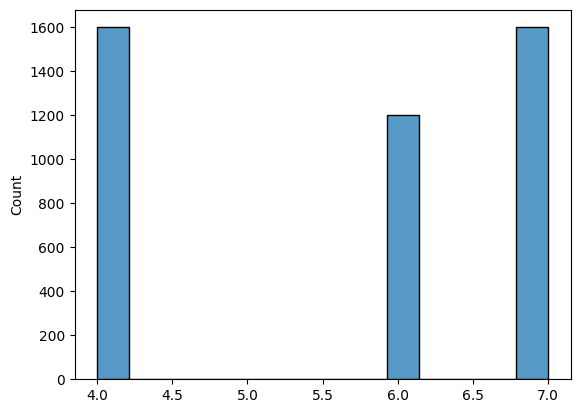

In [10]:
sns.histplot(Y_train)

In [30]:
dic = {6:0 ,4:1,7:2}

In [31]:
Y_train = [dic[i] for i in Y_train]

In [32]:
acc_path_Val_video="/content/drive/MyDrive/google solution/TrimedDataset4/Data/Valid/RoadAccidents_7"
acc_path_Val_label="/content/drive/MyDrive/google solution/TrimedDataset4/Labels/Valid/RoadAccidents_7"
normal_path_Val="/content/drive/MyDrive/google solution/TrimedDataset4/Data/Valid/Normal_6"
normal_path_Val_label="/content/drive/MyDrive/google solution/TrimedDataset4/Labels/Valid/Normal_6"
exp_path_Val_video="/content/drive/MyDrive/google solution/TrimedDataset4/Data/Valid/Explosion_4"
exp_path_Val_label="/content/drive/MyDrive/google solution/TrimedDataset4/Labels/Valid/Explosion_4"
acc_path_test_video="/content/drive/MyDrive/google solution/TrimedDataset4/Data/Test/RoadAccidents_7"
acc_path_test_label="/content/drive/MyDrive/google solution/TrimedDataset4/Labels/Test/RoadAccidents_7"
normal_path_test="/content/drive/MyDrive/google solution/TrimedDataset4/Data/Test/Normal_6"
normal_path_test_label="/content/drive/MyDrive/google solution/TrimedDataset4/Labels/Test/Normal_6"
exp_path_test_video="/content/drive/MyDrive/google solution/TrimedDataset4/Data/Test/Explosion_4"
exp_path_test_label="/content/drive/MyDrive/google solution/TrimedDataset4/Labels/Test/Explosion_4"


In [33]:
X_test=[]
Y_test=[]
X_val=[]
Y_val=[]

In [34]:
for i in os.listdir(acc_path_test_label):
  get_frames_and_label(acc_path_test_label+"/"+i,7,X_test,Y_test)
for i in os.listdir(normal_path_test_label):
  get_frames_and_label(normal_path_test_label+"/"+i,6,X_test,Y_test)
for i in os.listdir(exp_path_test_label):
  get_frames_and_label(exp_path_test_label+"/"+i,4,X_test,Y_test)

In [35]:
len(Y_test)

550

In [36]:
for i in os.listdir(acc_path_Val_label):
  get_frames_and_label(acc_path_Val_label+"/"+i,7,X_val,Y_val)
for i in os.listdir(normal_path_Val_label):
  get_frames_and_label(normal_path_Val_label+"/"+i,6,X_val,Y_val)
for i in os.listdir(exp_path_Val_label):
  get_frames_and_label(exp_path_Val_label+"/"+i,4,X_val,Y_val)

In [37]:
from tensorflow.keras.utils import to_categorical

In [38]:
Classes=3

In [39]:
Y_train=to_categorical(Y_train,num_classes=3,dtype='float32')

In [40]:
Y_test = [dic[i] for i in Y_test]
Y_val = [dic[i] for i in Y_val]

In [41]:
Y_val=to_categorical(Y_val,num_classes=3,dtype='float32')
Y_test=to_categorical(Y_test,num_classes=3,dtype='float32')

In [42]:
permutation_indices = np.random.permutation(len(Y_train))
X_train_final = X_train[permutation_indices]
Y_train_final = Y_train[permutation_indices]

In [43]:
X_val=np.asarray(X_val)
Y_val=np.asarray(Y_val)
X_test=np.asarray(X_test)
Y_test=np.asarray(Y_test)

In [44]:
print(X_train_final.shape)
print(Y_train_final.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)
print(Y_test.shape)

(4400, 100, 100, 3)
(4400, 3)
(550, 100, 100, 3)
(550, 3)
(550, 100, 100, 3)
(550, 3)


In [45]:
IMAGE_HEIGHT=100
IMAGE_WIDTH=100


In [46]:
import tensorflow as tf
LR = 0.0001

In [47]:
def feature_extractor(inputs):
    feature_extractor = (tf.keras.applications.DenseNet121(input_shape=(IMAGE_HEIGHT ,IMAGE_WIDTH, 3),
                                               include_top=False,
                                               weights="imagenet")(inputs))

    return feature_extractor

In [48]:
def classifier(inputs):
    x = tf.keras.layers.GlobalAveragePooling2D()(inputs)
    x = tf.keras.layers.Dense(256, activation="relu")(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(1024, activation="relu")(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(512, activation="relu")(x)
    x = tf.keras.layers.Dropout(0.4) (x)
    x = tf.keras.layers.Dense(Classes, activation="softmax", name="classification")(x)

    return x

In [49]:
def final_model(inputs):
    densenet_feature_extractor = (feature_extractor(inputs))
    classification_output = classifier(densenet_feature_extractor)

    return classification_output

In [50]:
def define_compile_model():

    inputs = tf.keras.layers.Input(shape=(IMAGE_HEIGHT ,IMAGE_WIDTH,3))
    classification_output = final_model(inputs)
    model = tf.keras.Model(inputs=inputs, outputs = classification_output)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics = ['accuracy'])
    return model

In [51]:
model = define_compile_model()
model.summary()

29084464/29084464 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 densenet121 (Functional)    (None, 3, 3, 1024)        7037504   
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1024)              263168 

In [52]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath='best_model_weights_acc_nor_exp_2.h5', save_best_only=True)

In [53]:
history = model.fit(x = X_train_final, y = Y_train_final ,validation_data=(X_val,Y_val),epochs = 10, batch_size=32,callbacks=[early_stopping])

Epoch 1/10
138/138 [==============================] - 104s 184ms/step - loss: 0.2964 - accuracy: 0.8145 - val_loss: 3.9850 - val_accuracy: 0.4709
Epoch 2/10
138/138 [==============================] - 15s 112ms/step - loss: 0.1399 - accuracy: 0.9300 - val_loss: 5.2611 - val_accuracy: 0.3964
Epoch 3/10
138/138 [==============================] - 16s 118ms/step - loss: 0.0942 - accuracy: 0.9591 - val_loss: 0.8061 - val_accuracy: 0.7455
Epoch 4/10
138/138 [==============================] - 15s 111ms/step - loss: 0.0771 - accuracy: 0.9630 - val_loss: 1.8791 - val_accuracy: 0.6418
Epoch 5/10
138/138 [==============================] - 16s 117ms/step - loss: 0.0687 - accuracy: 0.9666 - val_loss: 1.6224 - val_accuracy: 0.4673
Epoch 6/10
138/138 [==============================] - 16s 114ms/step - loss: 0.0593 - accuracy: 0.9741 - val_loss: 0.8538 - val_accuracy: 0.7127
Epoch 7/10
138/138 [==============================] - 16s 116ms/step - loss: 0.0805 - accuracy: 0.9659 - val_loss: 2.4940 - val_a

In [54]:
def predict(X_test,Y_test):
  class_pred=[]
  ct=0
  y_pred=model.predict(X_test)

  class_pred=[np.argmax(i) for i in y_pred]
  for i in range(len(class_pred)):
    if class_pred[i]==np.argmax(Y_test[i]):
      ct+=1
  acc=ct/len(class_pred)
  return acc,class_pred,y_pred


In [55]:
accuracy,prediction ,y_pred= predict(X_test,Y_test)
print(accuracy)

18/18 [==============================] - 3s 29ms/step
0.5545454545454546


In [56]:
# for i in range(len(prediction)):
  # print(f"{prediction[i]}->{Y_test[i]}")

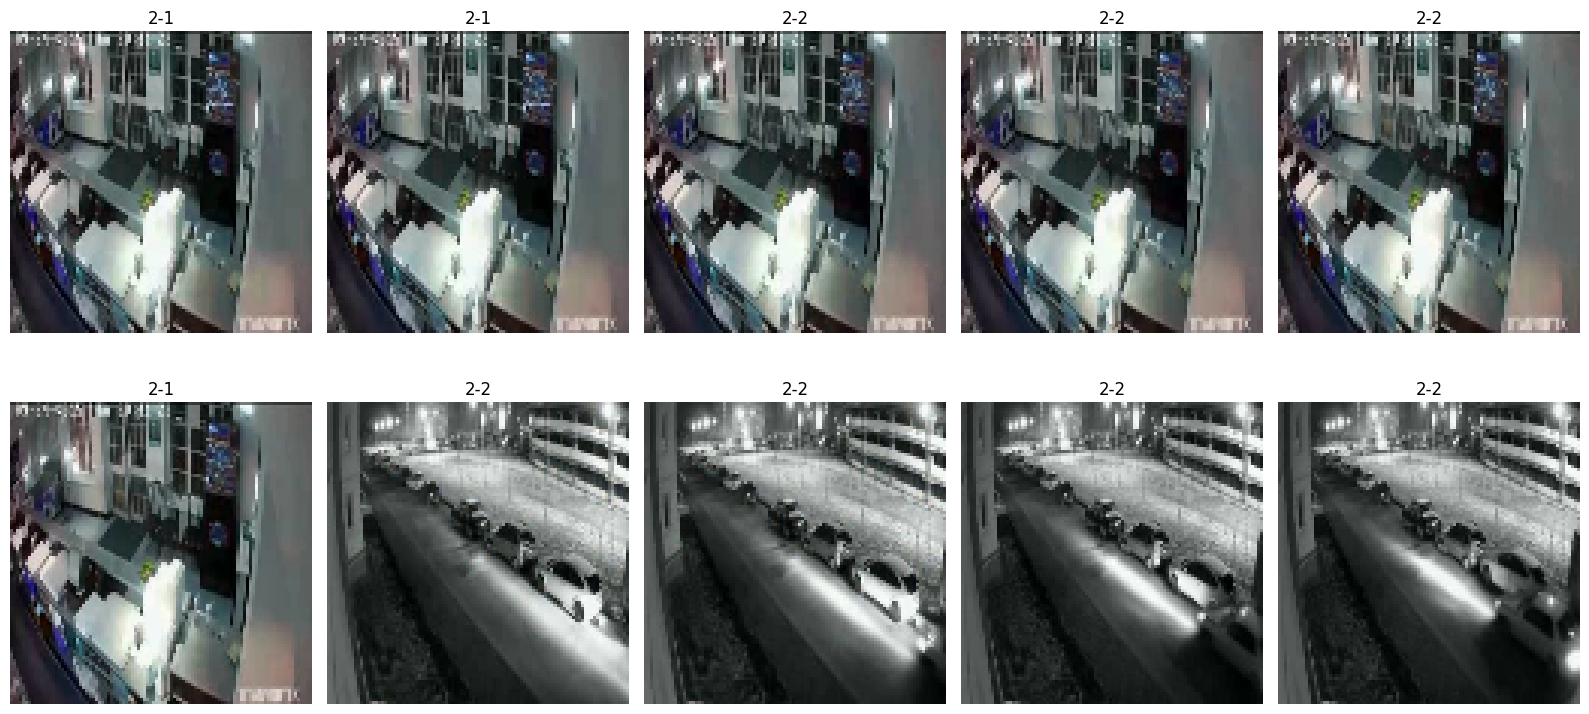

Normal:0 ,Explosion:1,RoadAccident:2


In [57]:
import matplotlib.pyplot as plt
import numpy as np
base=134
# Example: Replace this list with your actual list of image arrays
image_list = X_test[base:base+10]

# Plot the images
fig, axes = plt.subplots(2, 5, figsize=(16, 8))

for i, (image, ax) in enumerate(zip(image_list, axes.flatten())):
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(f'{np.argmax(Y_test[base+i])}-{prediction[base+i]}')

plt.tight_layout()
plt.show()
print("Normal:0 ,Explosion:1,RoadAccident:2")

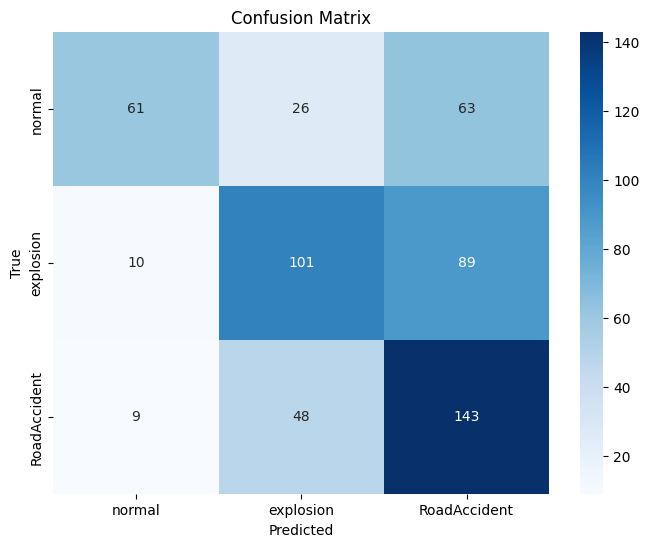

              precision    recall  f1-score   support

           0       0.76      0.41      0.53       150
           1       0.58      0.51      0.54       200
           2       0.48      0.71      0.58       200

    accuracy                           0.55       550
   macro avg       0.61      0.54      0.55       550
weighted avg       0.59      0.55      0.55       550



In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


conf_mat = confusion_matrix([np.argmax(i) for i in Y_test], prediction)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['normal','explosion','RoadAccident'],
            yticklabels=['normal','explosion','RoadAccident']
           )
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Additionally, you may want to print the classification report
print(classification_report([np.argmax(i) for i in Y_test], prediction))


In [59]:
model.save("/content/drive/MyDrive/google solution/exp_vs_acc_vs_normal_4-2-24.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [60]:
accuracy,prediction ,y_pred= predict(X_val,Y_val)
print(accuracy)

18/18 [==============================] - 1s 29ms/step
0.7454545454545455


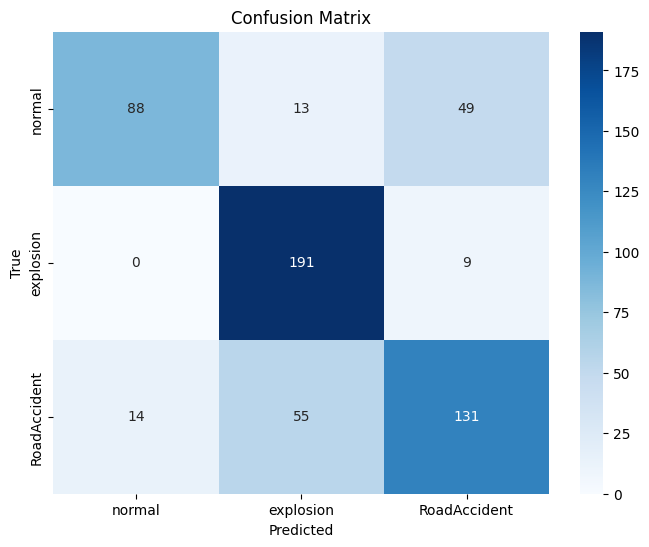

              precision    recall  f1-score   support

           0       0.86      0.59      0.70       150
           1       0.74      0.95      0.83       200
           2       0.69      0.66      0.67       200

    accuracy                           0.75       550
   macro avg       0.76      0.73      0.73       550
weighted avg       0.76      0.75      0.74       550



In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Calculate confusion matrix
conf_mat = confusion_matrix([np.argmax(i) for i in Y_val], prediction)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['normal','explosion','RoadAccident'],
            yticklabels=['normal','explosion','RoadAccident']
           )
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Additionally, you may want to print the classification report
print(classification_report([np.argmax(i) for i in Y_val], prediction))


In [ ]:
import pickle